# Linear Algebra: Applications

In [1]:
using LinearAlgebra, Plots

## Linear System of Equations

### Example: $Ax = b$  is equivalent to  $\alpha+\beta=5$  and  $2\alpha+3\beta=12$  for:
### <br>

### $A = \begin{bmatrix} 1 & 1 \\ 2 & 3 \end{bmatrix}$, $x = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$ and $b = \begin{bmatrix} 5 \\ 12 \end{bmatrix}$


In [5]:
A = [1.0 1; 2 3]
b = [5.0, 12]

x = A\ b    # Here comes the magical backslash


2-element Vector{Float64}:
 3.0
 2.0

### so $\alpha = 3$ and $\beta = 2$

### Example: Fitting a Line to Two Data Points 

### $(x_1, y_1) = (2, 3)$ and $(x_2, y_2) = (5, 5)$
### Our line is $y = \alpha + \beta x$ so $\alpha+2\beta=3$  and  $\alpha+\beta 5=5$ or:

### $A = \begin{bmatrix} 1 & 2 \\ 1 & 5 \end{bmatrix}$, $x = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$ and $b = \begin{bmatrix} 3 \\ 5 \end{bmatrix}$

[1.6666666666666667, 0.6666666666666666]


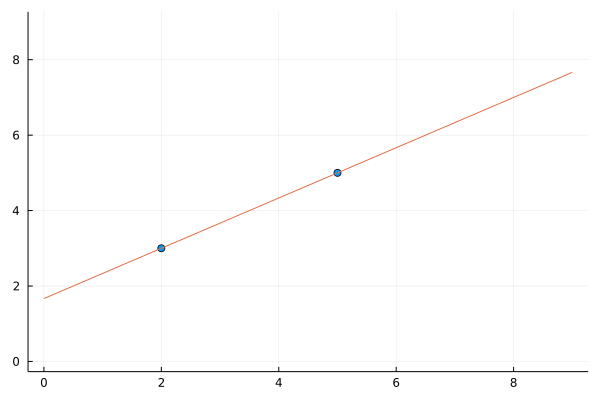

In [6]:
data_in = [2.0, 5]
data_out = [3.0, 5.0]

A = [ones(2) data_in]
b = data_out

x = A\ b
println(x)

scatter(data_in, data_out, legend = false, xlim = [0, 9], ylim = [0, 9])

f(t) = x[1] + x[2]*t
plot!(f)

## Linear Least Squares

### Minimize $\lVert e \rVert = \lVert Ax - b \rVert$ 

### Example: $A = \begin{bmatrix} 1 & 1 \\ 2 & 3 \\ 4 & 7 \end{bmatrix}$ 

### and

### $b = \begin{bmatrix} 5 \\ 12 \\ 20 \end{bmatrix}$

### It's like adding $4\alpha+7\beta=20$ to our first system of equations

In [7]:
A = [1.0 1; 2 3; 4 7]
b = [5, 12, 20]

x = A\ b
e = A*x - b

println("x = $x")
println("norm of e = $(norm(e))")

x = [6.857142857142846, -0.9999999999999944]
norm of e = 1.6035674514745468


## Line Fitting

### We can model linear regression as least squares
### We have $f(x) = \alpha + \beta x$ and our goal is to minimize $J = \Sigma_{i=1}^n (y_i - f(x_i))^2$
### If we build $A$ and $b$ in the same way we have $J = \lVert Ax - b \rVert$

### $A = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}$
### and
### $b = \begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix}$

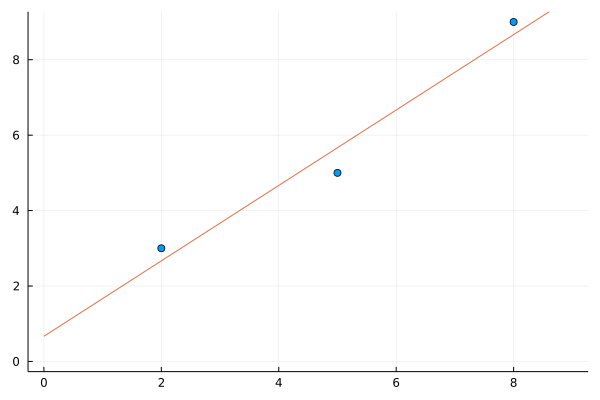

In [8]:
data_in = [2, 5, 8]
data_out = [3, 5, 9]

A = [ones(3) data_in]
b = data_out

x = A\ b

scatter(data_in, data_out, legend = false, xlim = [0, 9], ylim = [0, 9])

f(t) = x[1] + x[2]*t
plot!(f)

## Curve Fitting

### We want to fit a polynomial of degree n to data points
### Example: Fitting a 3th dgree ploynomial to 5 data points
### $A = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ 1 & x_3 & x_3^2 & x_3^3 \\ 1 & x_4 & x_4^2 & x_4^3 \\ 1 & x_5 & x_5^2 & x_5^3 \end{bmatrix}$
### and
### $b = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{bmatrix}$

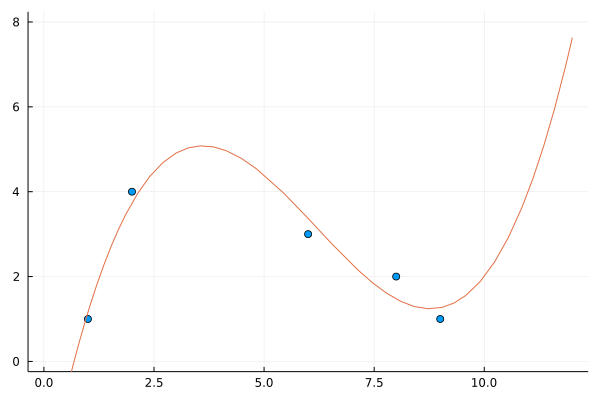

In [9]:
data_in = [1.0, 2, 6, 8, 9]
data_out = [1.0, 4, 3, 2, 1]


A = [ones(5) data_in data_in.^2 data_in.^3]
b = data_out

x = A\ b

scatter(data_in, data_out, legend = false, xlim = [0, 12], ylim = [0, 8])

f(t) = x[1] + x[2]*t + x[3]*t^2 + x[4]*t^3
plot!(f)

## Illumination

<img src =img-1.png>

In [ ]:
n = 25*25
m =9

make_cord(t) = [t%25, (t -t%25)/25]
make_num(cord) = Int64(cord[2]*25 + cord[1])

A = zeros(n, m)

lamps = make_num.([(4, 4), (13, 3), (22, 6), (6, 12), (12, 14), (20 ,13), (4, 19), (13, 18), (17, 18)])


for j in 1:m
    for i in 1:n
        if lamps[j] == i
            A[i ,j] = 1
        else
            A[i, j] = 0.8 / (norm(make_cord(i) - make_cord(lamps[j]))*1)
        end
    end
end

b = ones(n)
x = A\ b

In [ ]:
sol = A*x
sol_map = [sol[make_num((i, j))] for i in 1:25, j in 0:24]
heatmap(sol_map)

In [ ]:
histogram(sol, legend = false)

In [ ]:
simple = A*ones(m)
simple_map = [simple[make_num((i, j))] for i in 1:25, j in 0:24]
heatmap(simple_map)

In [ ]:
histogram(simple, legend = false)

## Tomography

<img src="img-2.png">

In [10]:
include("readclassjson.jl")

readclassjson (generic function with 1 method)

In [11]:
data = readclassjson("tomo_data.json")
L = data["line_pixel_lengths"]
N = data["N"]
npixels = data["npixels"]
y = data["y"]
n = npixels^2

900

In [12]:
A = transpose(L)
x = A\ y

900-element Vector{Float64}:
 211.78961151563868
  22.91022711144195
 105.91197272229292
 254.90777228872676
 254.9940338263175
 255.51570584633762
 254.09421109451768
 254.14553899802547
 255.05940259819766
 255.51828014905425
 254.76561982872
 255.23879980473575
 241.00930383156867
   ⋮
 241.32657289099203
 254.67694750613188
 255.03267906893856
 255.47456954213908
 240.97367926150147
 104.81001897801416
  22.509817180246554
   7.518179514681739
  41.58279675916163
 139.16951019508326
 250.60569833411628
 255.06973919711558

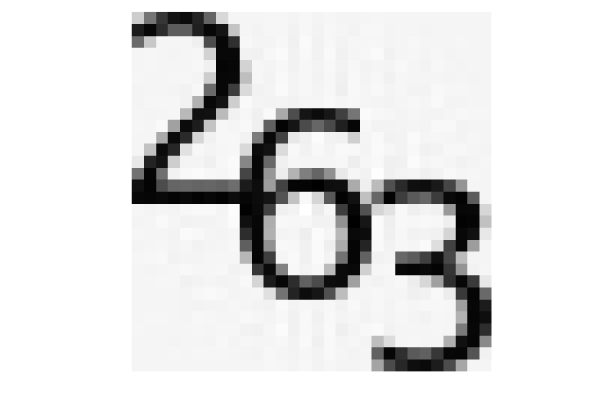

In [13]:
X = reshape(x, npixels, npixels)
heatmap(X, yflip = true, aspect_ratio = :equal, color = :gist_gray, cbar = :none, framestyle = :none)

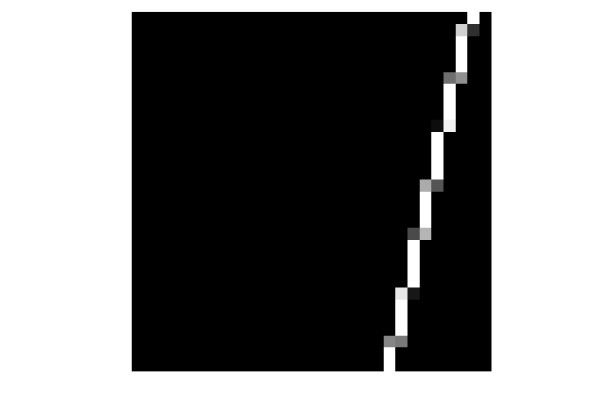

In [20]:
A_reshape = reshape(A[500, :], npixels, npixels)
heatmap(A_reshape, yflip = true, aspect_ratio = :equal, color = :gist_gray, cbar = :none, framestyle = :none)

## Factorization

In [21]:
A = rand(1:10, 4, 4)

4×4 Matrix{Int64}:
 2  5  1  5
 7  4  3  5
 5  1  3  2
 3  5  8  6

### LU Factorization

In [23]:
F = lu(A)

LU{Float64, Matrix{Float64}}
L factor:
4×4 Matrix{Float64}:
 1.0        0.0       0.0       0.0
 0.285714   1.0       0.0       0.0
 0.428571   0.851852  1.0       0.0
 0.714286  -0.481481  0.140449  1.0
U factor:
4×4 Matrix{Float64}:
 7.0  4.0      3.0       5.0
 0.0  3.85714  0.142857  3.57143
 0.0  0.0      6.59259   0.814815
 0.0  0.0      0.0       0.0337079

In [24]:
F.p     #L*U = A[p, :]

4-element Vector{Int64}:
 2
 1
 4
 3

In [26]:
F.P

4×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0

In [25]:
reverse(F.P)*F.L*F.U

4×4 Matrix{Float64}:
 2.0  5.0  1.0  5.0
 7.0  4.0  3.0  5.0
 5.0  1.0  3.0  2.0
 3.0  5.0  8.0  6.0

### QR Factorization

In [27]:
F = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
4×4 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.214423   0.688847   0.551692  -0.418509
 -0.750479  -0.125245   0.300858   0.574961
 -0.536056  -0.438357  -0.189149  -0.696211
 -0.321634   0.563602  -0.754548   0.0977824
R factor:
4×4 Matrix{Float64}:
 -9.32738  -6.21825  -6.6471   -7.82642
  0.0       5.32291   3.50686   5.32291
  0.0       0.0      -5.14957  -0.642839
  0.0       0.0       0.0      -0.0234678

In [28]:
Q, R = F
Q'Q     # It's I

4×4 Matrix{Float64}:
  1.0          -1.38778e-16  -2.77556e-17  -7.63278e-17
 -1.38778e-16   1.0           1.11022e-16  -1.59595e-16
 -2.77556e-17   1.11022e-16   1.0           1.52656e-16
 -7.63278e-17  -1.59595e-16   1.52656e-16   1.0

In [29]:
Q*R

4×4 Matrix{Float64}:
 2.0  5.0  1.0  5.0
 7.0  4.0  3.0  5.0
 5.0  1.0  3.0  2.0
 3.0  5.0  8.0  6.0

### Eigendecomposition

In [30]:
F = eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
4-element Vector{ComplexF64}:
  -0.753158999347953 - 1.9939465924557087im
  -0.753158999347953 + 1.9939465924557087im
 0.08040297296683437 + 0.0im
   16.42591502572909 + 0.0im
vectors:
4×4 Matrix{ComplexF64}:
 -0.0862625+0.302116im   …   -0.111681+0.0im  0.436282+0.0im
  -0.499135-0.0839037im      -0.670578+0.0im  0.570697+0.0im
  -0.263283-0.240252im      -0.0785539+0.0im  0.298586+0.0im
   0.719771-0.0im             0.729165+0.0im  0.628339+0.0im

In [31]:
vals, vecs =F.values, F.vectors

println(vals[2])
(A*vecs[:, 2]) ./ vecs[:, 2] 

-0.753158999347953 + 1.9939465924557087im


4-element Vector{ComplexF64}:
  -0.753158999347954 + 1.993946592455714im
 -0.7531589993479533 + 1.9939465924557063im
 -0.7531589993479542 + 1.9939465924557063im
 -0.7531589993479471 + 1.9939465924557085im

In [32]:
Λ = Diagonal(vals)
P = vecs

P*Λ*inv(P)

4×4 Matrix{ComplexF64}:
 2.0+4.14242e-16im  5.0-6.2546e-17im   1.0-9.67164e-17im  5.0-4.13886e-18im
 7.0+3.24084e-16im  4.0-1.01593e-16im  3.0-6.80545e-17im  5.0+3.16663e-17im
 5.0+6.23893e-17im  1.0-2.72864e-17im  3.0-1.67231e-17im  2.0-2.16408e-17im
 3.0+8.63263e-17im  5.0-1.64691e-16im  8.0+7.56509e-17im  6.0+2.86763e-18im

### factorize()

In [33]:
F = factorize(A)

LU{Float64, Matrix{Float64}}
L factor:
4×4 Matrix{Float64}:
 1.0        0.0       0.0       0.0
 0.285714   1.0       0.0       0.0
 0.428571   0.851852  1.0       0.0
 0.714286  -0.481481  0.140449  1.0
U factor:
4×4 Matrix{Float64}:
 7.0  4.0      3.0       5.0
 0.0  3.85714  0.142857  3.57143
 0.0  0.0      6.59259   0.814815
 0.0  0.0      0.0       0.0337079

In [34]:
F \ones(4)

4-element Vector{Float64}:
  -2.5000000000000284
 -17.166666666666853
  -2.3333333333333584
  18.833333333333535